# Assignment 2 - Filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
# this line is needed to display the plots and images inline on the notebook
%matplotlib inline 

## Low-pass filters
Load the test image sand_bilevel.png and add Gaussian noise $\mathcal{N}$(0,0.25).

### Exercise 1
Test filter performance of different image filters:
* Box (3$\times$3, 5$\times$5, 7$\times$7)
* Gauss $\sigma$=1,2,3



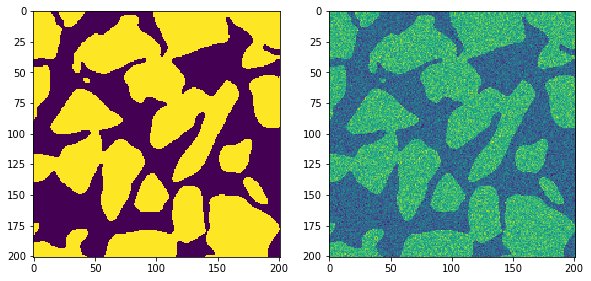

In [2]:
original = plt.imread('sand_bilevel.png') # add you loadning code here
noisy    = original + np.random.normal(0,0.25,original.shape) # add the Gaussian noise
plt.figure(figsize=[15,7])
plt.subplot(1,3,1)
plt.imshow(original)
plt.subplot(1,3,2)
plt.imshow(noisy)

### Box filter
b = ndimage.filters.uniform_filter(img,[N,N])

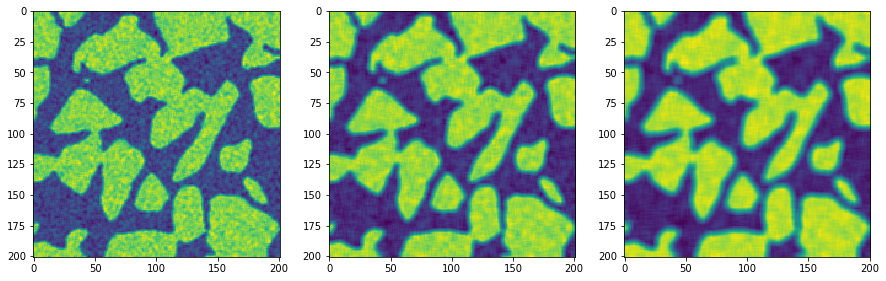

In [3]:
plt.figure(figsize=[15,7])
b3 = ndimage.filters.uniform_filter(noisy,[3,3])
b5 = ndimage.filters.uniform_filter(noisy,[5,5])
b7 = ndimage.filters.uniform_filter(noisy,[7,7])

plt.subplot(1,3,1)
plt.imshow(b3)

plt.subplot(1,3,2)
plt.imshow(b5)

plt.subplot(1,3,3)
plt.imshow(b7)

### Gauss filter
g = ndimage.filters.gaussian_filter(img,sigma=s)

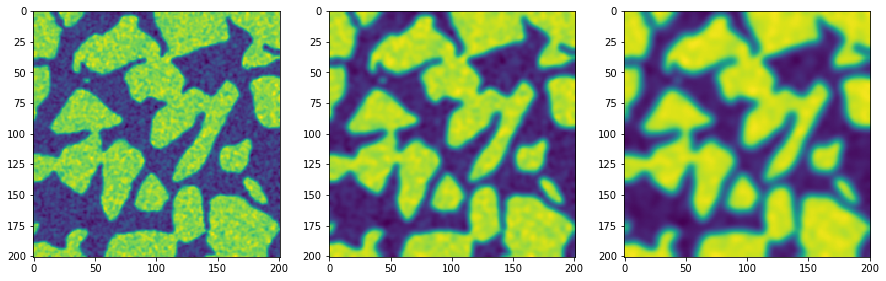

In [4]:
plt.figure(figsize=[15,7])
g1 = ndimage.filters.gaussian_filter(noisy,sigma=1)
g2 = ndimage.filters.gaussian_filter(noisy,sigma=2)
g3 = ndimage.filters.gaussian_filter(noisy,sigma=3)

plt.subplot(1,3,1)
plt.imshow(g1)

plt.subplot(1,3,2)
plt.imshow(g2)

plt.subplot(1,3,3)
plt.imshow(g3)

## Separable kernels
### Exercise 2 
Compare (subtract) how well separation of a kernel works. Use box filters 3$\times$3 and 7$\times$7. 
* How well does it match visually
* Is there a numeric difference, why?

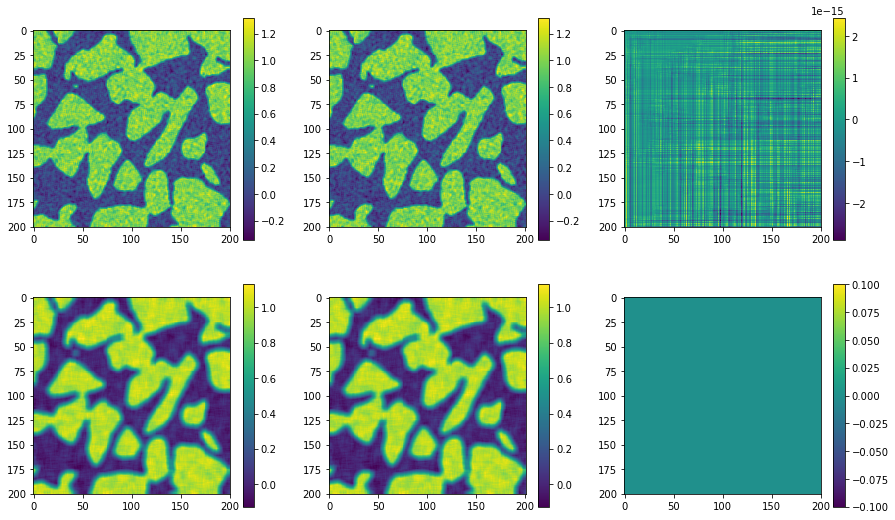

In [5]:
sb3=ndimage.filters.uniform_filter(ndimage.filters.uniform_filter(noisy,[1,3]),[3,1])
sb7=ndimage.filters.uniform_filter(ndimage.filters.uniform_filter(noisy,[7,1]),[1,7])
plt.figure(figsize=[15,9])
plt.subplot(2,3,1)
plt.imshow(b3)
plt.colorbar()
plt.subplot(2,3,2)
plt.imshow(sb3)
plt.colorbar()
plt.subplot(2,3,3)
plt.imshow(sb3-b3)
plt.colorbar()

plt.subplot(2,3,4)
plt.imshow(b7)
plt.colorbar()

plt.subplot(2,3,5)
plt.imshow(sb7)
plt.colorbar()

plt.subplot(2,3,6)
plt.imshow(sb7-b7)
plt.colorbar()

## Gradients

Now we want to test the accuracy of two gradient kernels. To do
this create a 1001$\times$ 1001 image representing

$f(x,y)=\sin(x^2+y^2),\qquad -5\leq x,\,y\leq 5$

This will be our test image. Compute the analytical gradient of
$f(x,y)$:

$\nabla\,f=\left[\begin{array}{cc}\frac{\partial}{\partial x}f &
\frac{\partial}{\partial y}f\end{array}\right]$

and create an image containing the argument of the gradient (use
atan2), this will be our reference image.

Now create the filter kernels for

$G1_x={G1_y}^T=\frac{1}{2}\left[\begin{array}{cc} -1 & 1\end{array}\right]$

and the gradient according to Jähne

$G2_y={G2_x}^T=\frac{1}{32}\left[\begin{array}{ccc} -3 &-10& -3\\0&
0 &0\\3 &10& 3\end{array}\right]$

Filter the test image with the kernels and compute the argument.
Compare the argument with the true argument image. You might need
to change the color axis with caxis. Conclusion?

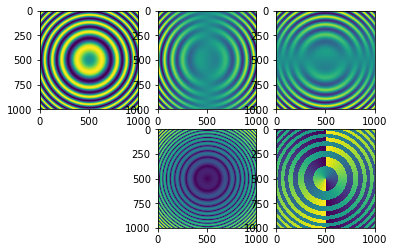

In [27]:
x,y=np.meshgrid(np.arange(-5,5,0.01),np.arange(-5,5,0.01))
f=np.sin(x**2+y**2)
dfdx=-2*x*np.cos(x**2+y**2)
dfdy=-2*y*np.cos(x**2+y**2)
magdf=np.sqrt(dfdx**2+dfdy**2)
argdf=np.arctan2(dfdx,dfdy)
plt.subplot(2,3,1)
plt.imshow(f)

plt.subplot(2,3,2)
plt.imshow(dfdx)

plt.subplot(2,3,3)
plt.imshow(dfdy)

plt.subplot(2,3,5)
plt.imshow(magdf)

plt.subplot(2,3,6)
plt.imshow(argdf)

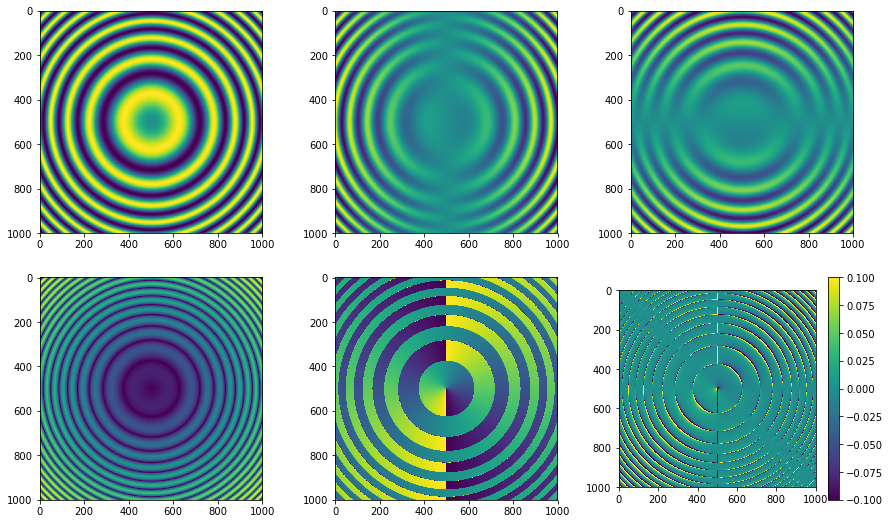

In [34]:
plt.figure(figsize=[15,9])
G1x=0.5*np.array([[0,0,0],[-1.0,1.0,0.0],[0,0,0]])
G1y=np.transpose(G1x)
dfdx1=ndimage.filters.convolve(f,G1x)
dfdy1=ndimage.filters.convolve(f,G1y)

magdf1=np.sqrt(dfdx1**2+dfdy1**2)
argdf1=np.arctan2(dfdx1,dfdy1)

plt.subplot(2,3,1)
plt.imshow(f)
plt.subplot(2,3,2)
plt.imshow(dfdx1)
plt.subplot(2,3,3)
plt.imshow(dfdy1)

plt.subplot(2,3,4)
plt.imshow(magdf1)

plt.subplot(2,3,5)
plt.imshow(argdf1)

plt.subplot(2,3,6)
plt.imshow(argdf1-argdf,clim=[-0.1,0.1]) 
plt.colorbar()

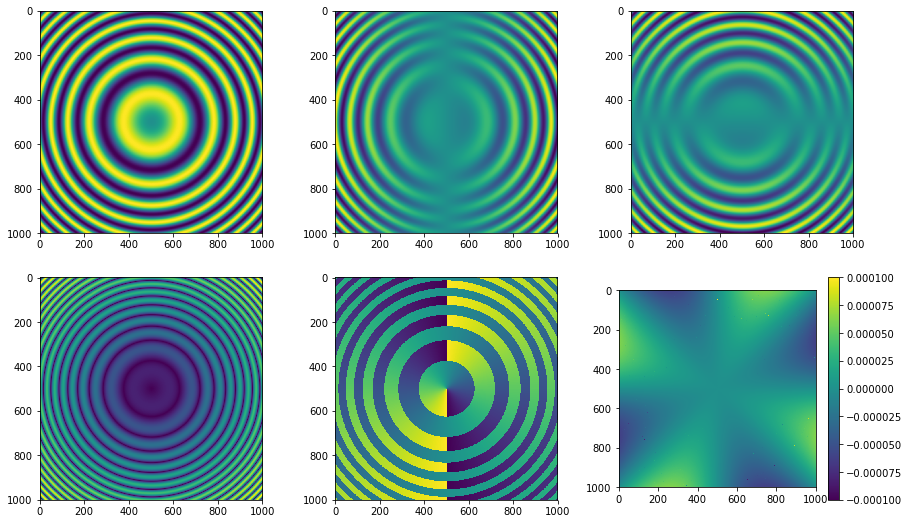

In [35]:
plt.figure(figsize=[15,9])

G2x=1/32*np.array([[-3,0,3],[-10.0,0.0,10.0],[-3,0,3]])
G2y=np.transpose(G2x)
dfdx2=ndimage.filters.convolve(f,G2x)
dfdy2=ndimage.filters.convolve(f,G2y)

magdf2=np.sqrt(dfdx2**2+dfdy2**2)
argdf2=np.arctan2(dfdx2,dfdy2)

plt.subplot(2,3,1)
plt.imshow(f)
plt.subplot(2,3,2)
plt.imshow(dfdx2)
plt.subplot(2,3,3)
plt.imshow(dfdy2)

plt.subplot(2,3,4)
plt.imshow(magdf2)

plt.subplot(2,3,5)
plt.imshow(argdf2)

plt.subplot(2,3,6)
plt.imshow(argdf2-argdf,clim=[-0.0001,0.0001])
plt.colorbar()

Note the difference in display intervals between the two compared cases

## Gradient performance with noisy images
Use the noisy image you created for low pass filter images. Compute the
gradient of the image. As you will see is the gradient sensitive
to noise. To avoid this can a low-pass filter be applied before
computing the gradient.

Now compute the Laplacian of a smoothed image

$g=\triangle(G_{\sigma}*(f+n))$

Where $G_{\sigma}$ is a Gaussian kernel. Use the gradient defined
by Jähne. Implement this filter and try the performance with
different $\sigma$. What happens when $\sigma$ is small?

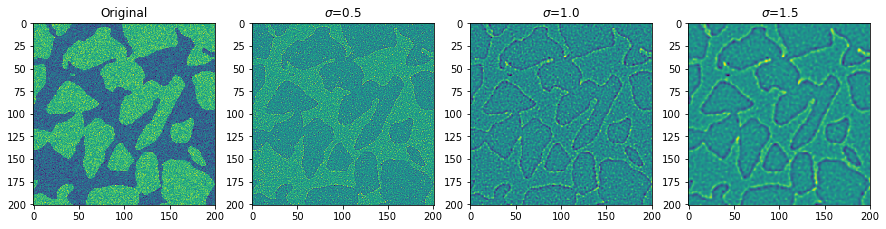

In [46]:
plt.figure(figsize=[15,7])
plt.subplot(1,4,1)
plt.imshow(noisy)
plt.title('Original')
plt.subplot(1,4,2)
plt.imshow(ndimage.filters.gaussian_laplace(noisy,0.5))
plt.title('$\sigma$=0.5')
plt.subplot(1,4,3)
plt.imshow(ndimage.filters.gaussian_laplace(noisy,1.0))
plt.title('$\sigma$=1.0')
plt.subplot(1,4,4)
plt.imshow(ndimage.filters.gaussian_laplace(noisy,1.5))
plt.title('$\sigma$=1.5')

The edges are less pronounced for small $\sigma$. I.e. $\sigma$ sets the scale of the smallest detectable edges.